## Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.dropna(inplace= True)

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
print(df.shape)
df.head()

(20433, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
X = df.drop(['median_house_value'], axis=1)
X.head()
y= df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN


In [11]:
train = X_train.join(y_train)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,<1H OCEAN,259900.0
12478,-121.48,38.59,52.0,1186.0,341.0,1038.0,320.0,1.6116,INLAND,70500.0
5996,-117.73,34.09,36.0,1543.0,297.0,1355.0,303.0,3.5313,INLAND,117800.0
11827,-121.02,39.01,17.0,4786.0,799.0,2066.0,770.0,3.9734,INLAND,185400.0
5183,-118.26,33.94,41.0,1510.0,410.0,1408.0,389.0,1.6500,<1H OCEAN,94200.0
...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,4323.0,775.0,1479.0,663.0,6.0758,INLAND,226800.0
19844,-119.09,36.42,17.0,877.0,219.0,966.0,218.0,2.0000,INLAND,52500.0
9944,-122.26,38.16,23.0,2840.0,491.0,1586.0,466.0,4.0337,NEAR BAY,130400.0
10908,-117.86,33.74,9.0,525.0,171.0,1257.0,165.0,3.3750,<1H OCEAN,165300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

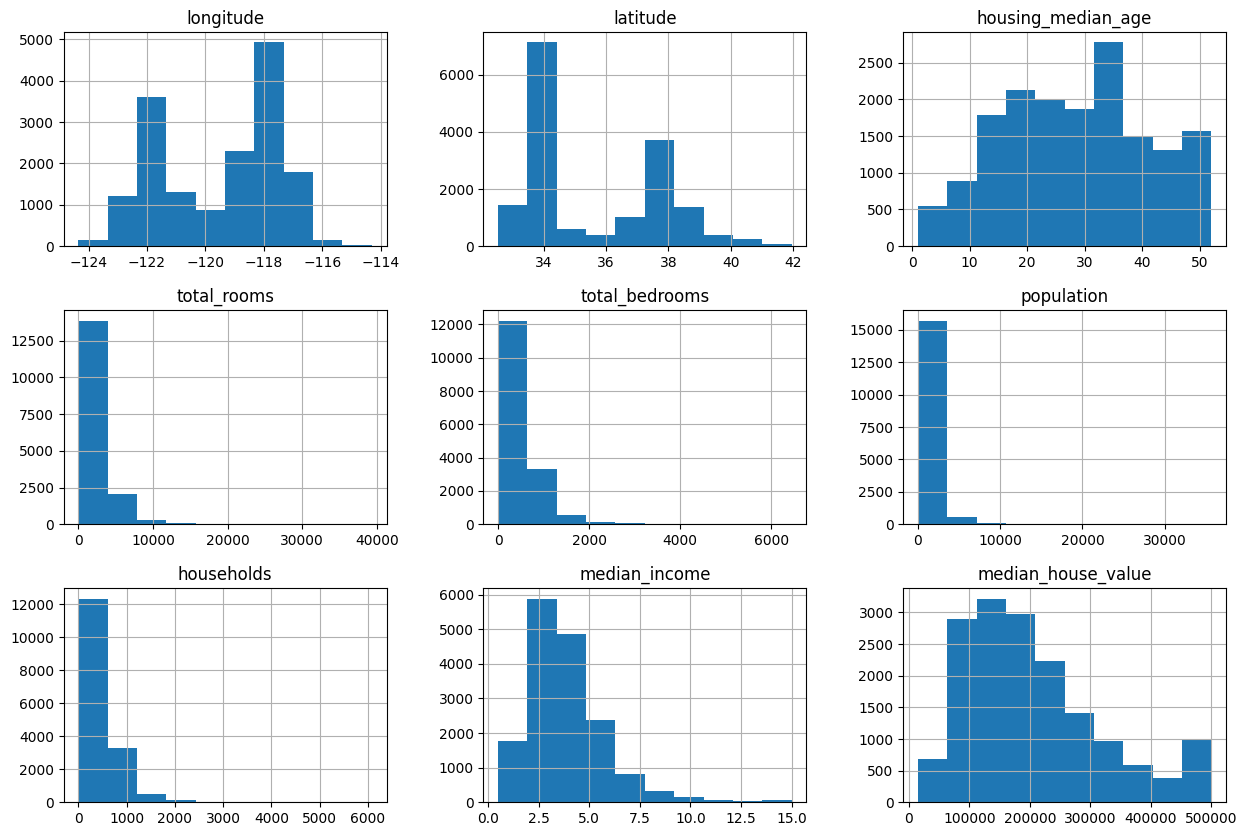

In [12]:
train.hist(figsize=(15,10))

In [13]:
train.drop(['ocean_proximity'], axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924855,-0.108972,0.044112,0.068264,0.098651,0.055665,-0.011551,-0.046276
latitude,-0.924855,1.000000,0.012083,-0.037114,-0.067702,-0.108487,-0.072715,-0.083271,-0.144174
housing_median_age,-0.108972,0.012083,1.000000,-0.358566,-0.319112,-0.292397,-0.300634,-0.118274,0.107539
total_rooms,0.044112,-0.037114,-0.358566,1.000000,0.929523,0.854883,0.919955,0.199294,0.134835
total_bedrooms,0.068264,-0.067702,-0.319112,0.929523,1.000000,0.874058,0.980793,-0.005700,0.051644
population,0.098651,-0.108487,-0.292397,0.854883,0.874058,1.000000,0.902333,0.007928,-0.023004
households,0.055665,-0.072715,-0.300634,0.919955,0.980793,0.902333,1.000000,0.015718,0.067404
median_income,-0.011551,-0.083271,-0.118274,0.199294,-0.005700,0.007928,0.015718,1.000000,0.687664
median_house_value,-0.046276,-0.144174,0.107539,0.134835,0.051644,-0.023004,0.067404,0.687664,1.000000


<Axes: >

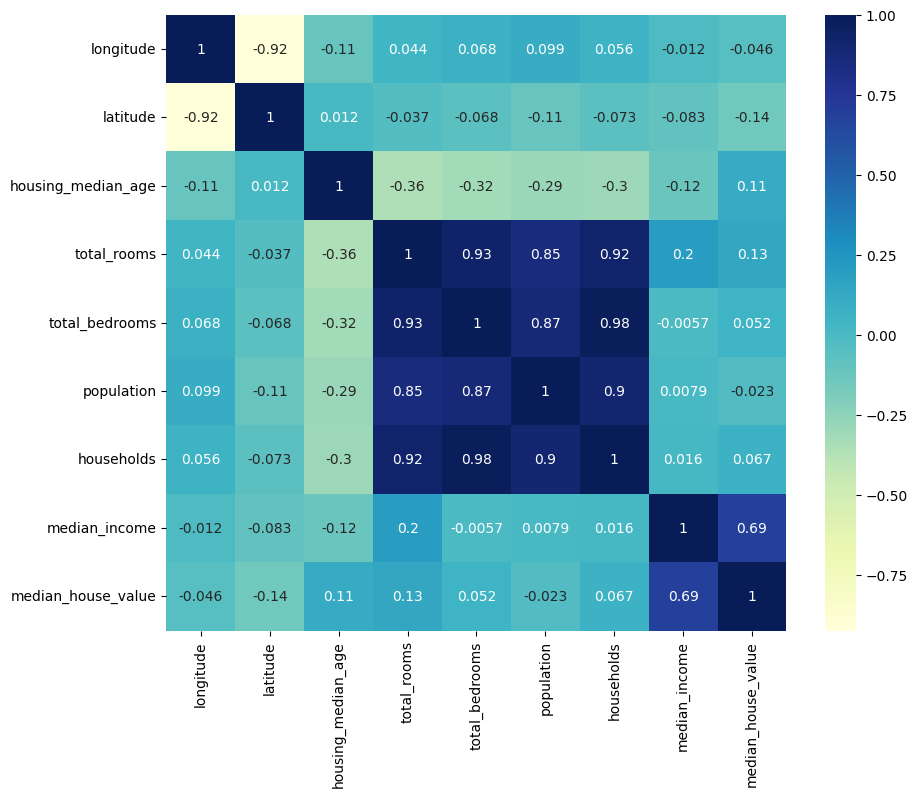

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.drop(['ocean_proximity'], axis=1).corr(), annot=True, cmap='YlGnBu')

In [15]:
train['total_rooms'] = np.log(train['total_rooms'] + 1)
train['total_bedrooms'] = np.log(train['total_bedrooms'] + 1)
train['population'] = np.log(train['population'] + 1)
train['households'] = np.log(train['households'] + 1)

In [16]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,<1H OCEAN,259900.0
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,INLAND,70500.0
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,INLAND,117800.0
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,INLAND,185400.0
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,<1H OCEAN,94200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

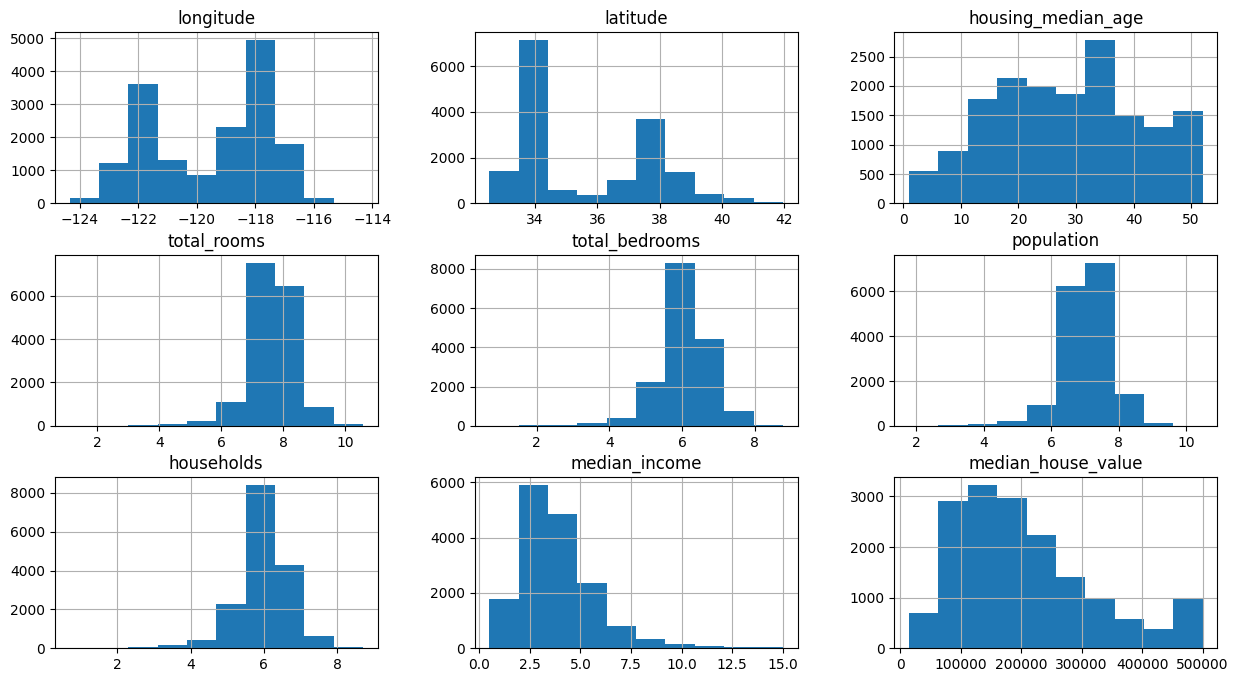

In [17]:
train.hist(figsize=(15,8))

In [18]:
train['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7211
INLAND        5202
NEAR OCEAN    2114
NEAR BAY      1815
ISLAND           4
Name: count, dtype: int64

In [19]:
train_data = train.join(pd.get_dummies(train['ocean_proximity']))
train_data = train_data.drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,259900.0,True,False,False,False,False
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,70500.0,False,True,False,False,False
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,117800.0,False,True,False,False,False
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,185400.0,False,True,False,False,False
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,94200.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,226800.0,False,True,False,False,False
19844,-119.09,36.42,17.0,6.777647,5.393628,6.874198,5.389072,2.0000,52500.0,False,True,False,False,False
9944,-122.26,38.16,23.0,7.951911,6.198479,7.369601,6.146329,4.0337,130400.0,False,False,False,True,False
10908,-117.86,33.74,9.0,6.265301,5.147494,7.137278,5.111988,3.3750,165300.0,True,False,False,False,False


<Axes: >

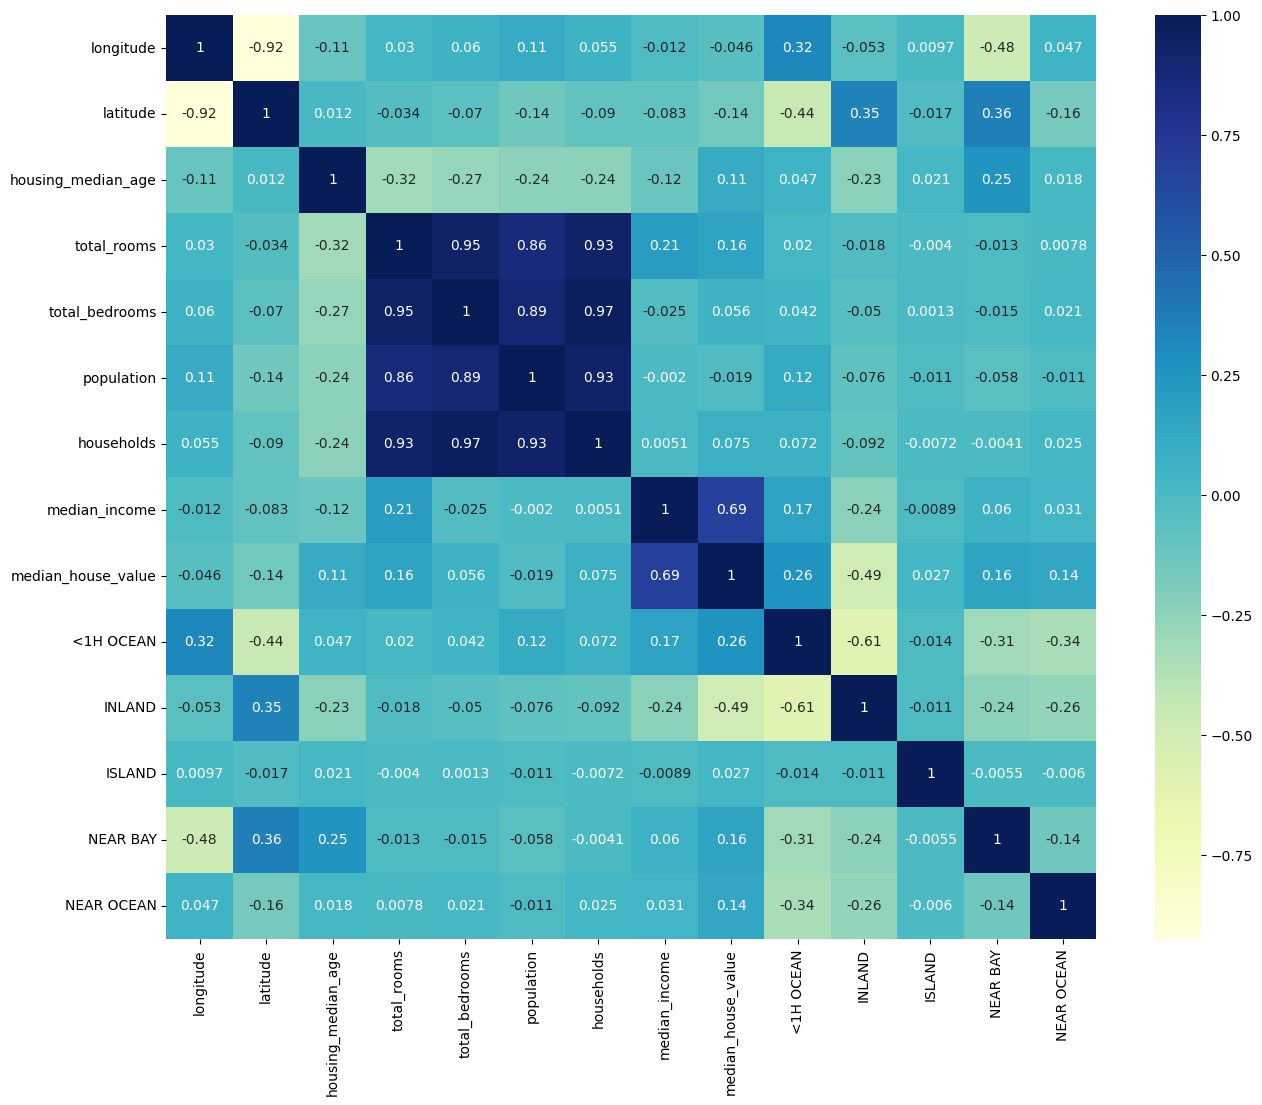

In [20]:
plt.figure(figsize=(15,12
                   ))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

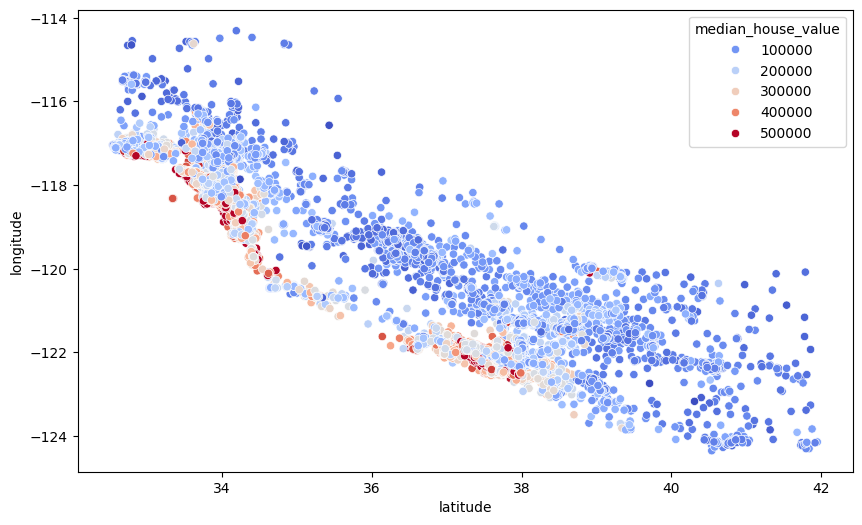

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

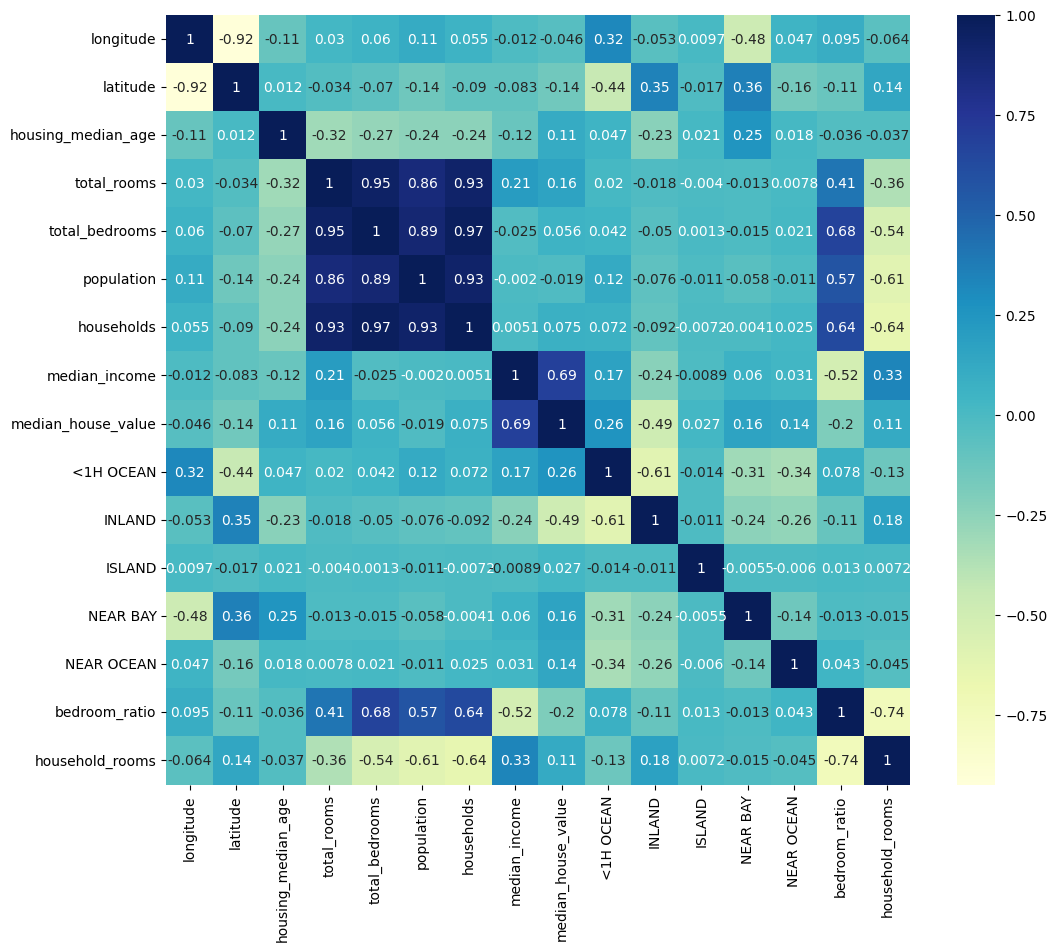

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap = 'YlGnBu')